In [3]:
#Importing necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
#Imporing Data set
data = pd.read_csv("emails.csv")
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
data.shape

(5728, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [7]:
data['text'][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [8]:
data.loc[data['spam'] == 'spam', 'Category',] = 1
data.loc[data['spam'] == 'ham', 'Category',] = 0

In [9]:
X = data['text']
Y = data['spam']

In [10]:
print(X)

0       Subject: naturally irresistible your corporate...
1       Subject: the stock trading gunslinger  fanny i...
2       Subject: unbelievable new homes made easy  im ...
3       Subject: 4 color printing special  request add...
4       Subject: do not have money , get software cds ...
                              ...                        
5723    Subject: re : research and development charges...
5724    Subject: re : receipts from visit  jim ,  than...
5725    Subject: re : enron case study update  wow ! a...
5726    Subject: re : interest  david ,  please , call...
5727    Subject: news : aurora 5 . 2 update  aurora ve...
Name: text, Length: 5728, dtype: object


In [11]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
5723    0
5724    0
5725    0
5726    0
5727    0
Name: spam, Length: 5728, dtype: int64


In [12]:
data['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

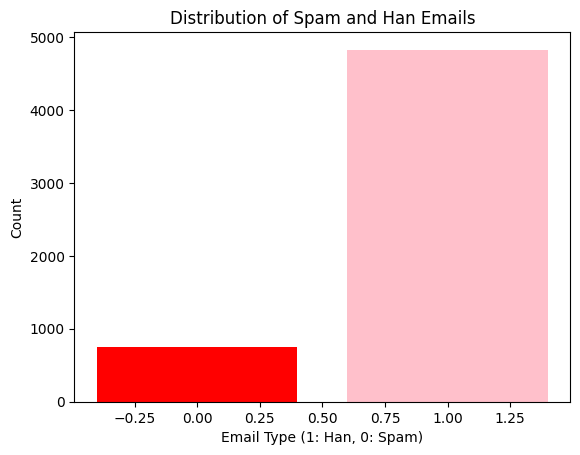

In [13]:
categories = [1,0]
counts = [4825,747]
plt.bar(categories, counts, color=['pink', 'red'])

plt.xlabel('Email Type (1: Han, 0: Spam)')
plt.ylabel('Count')
plt.title('Distribution of Spam and Han Emails')

plt.show()


In [14]:
data.duplicated().sum()

33

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
data.duplicated().sum()

0

In [17]:
data.isnull().sum()

text           0
spam           0
Category    5695
dtype: int64

In [18]:
def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean

In [19]:
data.shape

(5695, 3)

In [20]:
5728-33

5695

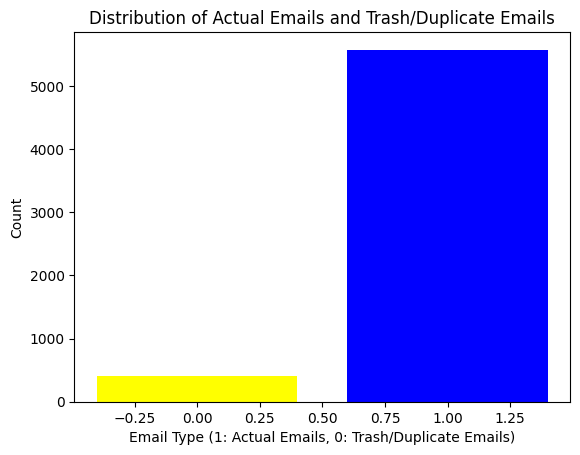

In [21]:
import matplotlib.pyplot as plt

categories = [1, 0]
counts = [5572, 415]

plt.bar(categories, counts, color=['blue', 'yellow'])

plt.xlabel('Email Type (1: Actual Emails, 0: Trash/Duplicate Emails)')
plt.ylabel('Count')
plt.title('Distribution of Actual Emails and Trash/Duplicate Emails')

plt.show()

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2 , random_state = 3)

In [23]:
X_train.shape

(4582,)

In [24]:
X_test.shape

(1146,)

In [25]:
Y_train.shape

(4582,)

In [26]:
Y_test.shape

(1146,)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
cv = CountVectorizer()
x_train = cv.fit_transform(X_train)

In [29]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [30]:
x_test = cv.transform(X_test)

In [31]:
len(x_test.toarray())

1146

In [32]:
len(x_test.toarray()[0])

33680

In [33]:
model = MultinomialNB()

In [34]:
model.fit(x_test, Y_test)

MultinomialNB()

In [35]:
y_pred = model.predict(x_test)

In [36]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english' , lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [37]:
print(X_train_features)

  (0, 1631)	0.11948158504424804
  (0, 2175)	0.1139366811829867
  (0, 2270)	0.09287045505205638
  (0, 7353)	0.0655788157361805
  (0, 15304)	0.0663995869621661
  (0, 28666)	0.06431166772110039
  (0, 28707)	0.06016733162188114
  (0, 12928)	0.06467963832229102
  (0, 21474)	0.05636789397124751
  (0, 21089)	0.03528233862778253
  (0, 33086)	0.043228163741262066
  (0, 14600)	0.044761414388067036
  (0, 31687)	0.05286353166660429
  (0, 8779)	0.15915971536413323
  (0, 8929)	0.2046990616246818
  (0, 31574)	0.08608147431672733
  (0, 29719)	0.09538081914466627
  (0, 15873)	0.06034727389686767
  (0, 24009)	0.059727569756054304
  (0, 25478)	0.100523433523679
  (0, 3685)	0.1139366811829867
  (0, 30510)	0.07784647543051056
  (0, 15183)	0.07546212040150725
  (0, 32265)	0.044560090228177425
  (0, 6690)	0.06742389347978599
  :	:
  (4581, 429)	0.07532196662652381
  (4581, 18624)	0.062223221403916826
  (4581, 32353)	0.10192506274469543
  (4581, 4987)	0.11815520710746134
  (4581, 16993)	0.10310140246650003
  

In [38]:
model = LogisticRegression()

In [39]:
model.fit(X_train_features, Y_train)

LogisticRegression()

In [40]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [41]:
print('Accuracy on training data :', accuracy_on_training_data)

Accuracy on training data : 0.9965080750763858


In [42]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test,prediction_on_test_data)

In [43]:
print('Accuracy on test data :', accuracy_on_test_data)

Accuracy on test data : 0.9834205933682374


In [44]:
def detect_malicious_keywords(input_your_mail):
    malicious_keywords = ["virus", "bounty", "malware", "phishing", "hack", "exploit", "danger", "threat", "attack", "otp", "bank"]

    for keyword in malicious_keywords:
        for email in input_your_mail:
            if keyword in email.lower():
                return True
    return False

input_your_mail = ["Here is Your Bounty !! Click here to get your reward.. give your otp"]

preprocessed_mail = [email.strip().lower() for email in input_your_mail]
input_data_features = feature_extraction.transform(preprocessed_mail)
prediction = model.predict(input_data_features)
print(prediction)

if prediction[0] == 1:
    print('Spam Mail')
else:
    print('Han Mail')

if detect_malicious_keywords(input_your_mail):
    print("Warning: This email could be malicious or harmful. Exercise caution before opening it.")
else:
    print("The email seems to be safe.")


[1]
Spam Mail


In [45]:
import socket
import re

def get_spf_ip_addresses(domain, dns_server='1.1.1.1', timeout=10):
    try:

        resolver = socket.gethostbyname(domain)
        query = f'_spf.{domain}'

        result = socket.gethostbyname_ex(query)

        # Check if the SPF record is present in the result
        if result and len(result) > 1:
            spf_record = result[1][0]
            # Extract IP addresses from the SPF record using a simple regex
            ip_addresses = re.findall(r'ip[46]:[^\s]+', spf_record)
            return ip_addresses
        return []
    except socket.gaierror:
        return "Domain not found (no DNS record)"
    except socket.timeout:
        return "DNS query timed out"
    except Exception as e:
        return f"Error: {e}"

# Example usage with a specific DNS server (Cloudflare's public DNS in this case)
email_address = "anindadebta8680@gmail.com"
domain = email_address.split('@')[1]

ip_addresses = get_spf_ip_addresses(domain, dns_server='1.1.1.1')
print(f"IP addresses allowed by SPF for {domain}: {ip_addresses}")

IP addresses allowed by SPF for gmail.com: Domain not found (no DNS record)


In [46]:
import re

def extract_domain_from_email(email):

    email_pattern = re.compile(r'@([a-zA-Z0-9.-]+)$')

    match = email_pattern.search(email)
    if match:
        return match.group(1)
    else:
        return None

received_email = "sankalpasarkar68@gmail.com"
domain = extract_domain_from_email(received_email)

if domain:
    print(f"The domain of the email address {received_email} is: {domain}")
else:
    print("Invalid email address format.")


The domain of the email address sankalpasarkar68@gmail.com is: gmail.com


In [50]:
import socket

sender_email = "sankalpasarkar68@gmail.com"
domain_name = sender_email.split("@")[1]
ip_address = socket.gethostbyname(domain_name)
print(f"The IP address of {sender_email} is {ip_address}")


The IP address of sankalpasarkar68@gmail.com is 142.251.2.83


In [53]:
import re
def is_valid_ip(ip):

    ip_pattern = re.compile(r'^\b(?:\d{1,3}\.){3}\d{1,3}\b$')

    if ip_pattern.match(ip):
        return 0
    else:
        return 1

ip_address = "142.251.241.8301"
result = is_valid_ip(ip_address)

if result == 0:
    print(f"The IP address {ip_address} is valid.")
else:
    print(f"The IP address {ip_address} is spoofed or invalid.")

The IP address 142.251.241.8301 is spoofed or invalid.


In [54]:
import re

ip = "172.29.5.0"

regex1 = '^66\.220\.(11[4-9]|1[2-5]\d)\.([1-9]?\d|[12]\d\d)$'
regex2 = '^69\.63\.(17[6-9]|18\d|19[01])\.([1-9]?\d][12]\d\d)$'
regex3 = '^204\.15\.2[0-3]\.([1-9]?\d][12]\d\d)$'

if(re.fullmatch(regex1, ip) or re.fullmatch(regex2, ip) or re.fullmatch(regex3, ip)):
  print("Valid IP")

else:
  print("Spoofed IP")

#Range of IP addresses used by facebook
#66.220.144.0 - 66.220.159.255
#69.63.176.0 - 69.63.191.255
#204.15.20.0 - 204.15.23.255
#Active IPs of facebook
#69.63.176.13
#69.63.181.15
#69.63.184.142
#69.63.187.17
#69.63.187.18
#69.63.187.19
#69.63.181.11
#69.63.181.12

Spoofed IP


In [ ]:
def count_char_occurrences(input_string, target_char):
    count = 0
    for char in input_string:
        if char == target_char:
            count += 1
    return count

input_string = "https://jupyter.org/try-jupyter/notebooks/?path=Spam+Email+and+Email+Spoofing+Detector+V3.ipynb"
target_char = "%"

result = count_char_occurrences(input_string, target_char)
print(f"The character '{target_char}' appears {result} times in the input string.")

The character '%' appears 0 times in the input string.
